# Implementation Exercise: Regularization in Practice

## Objective

Learn how to implement regularization techniques, such as L1/L2 regularization and Dropout, in neural networks to prevent overfitting.


## Setup

Begin by importing the necessary libraries and preparing a dataset. For simplicity, we'll continue using a synthetic dataset for a binary classification task.


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

print(data.head())

# Preprocess the dataset: Predicting wine quality (binary classification: good or bad)
data["quality"] = data["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Splitting the data into features and target
X = data.drop("quality", axis=1)
y = data["quality"].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

2023-11-29 11:49:41.317575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Define the Base Neural Network Model

Create a function to build a simple neural network model without regularization. This will serve as our baseline for comparison.


In [7]:
def build_base_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(20, activation="relu", input_shape=(11,)),
            tf.keras.layers.Dense(20, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## Implement L1/L2 Regularization

Add L1 and/or L2 regularization to the model. Modify the build_base_model function to include L1/L2 regularization in the dense hidden layers. hint: check the kernel_regularizer parameter in the tf.keras.layers.Dense


In [8]:



# TASK: Modify this function to include L1 or L2 regularization
def build_regularized_model(l1=0.01, l2=0.01):
    model = tf.keras.models.Sequential(
        [   tf.keras.layers.Dense(
                20,
                activation="relu",
                input_shape=(11,),
            ),
            tf.keras.layers.Dense(
                20,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.L1(l1=l1),
                activity_regularizer=tf.keras.regularizers.L2(l2=l2),
            ),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ]
    )
    # Your code here to add L1/L2 regularization
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## Implement Dropout

Incorporate Dropout into the neural network. Modify the build_base_model function to add Dropout layers after each hidden layer. hint: tf.keras.layers.Dropout


In [11]:
# TASK: Modify this function to include Dropout
def build_dropout_model(dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation="relu", input_shape=(11,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
    ])
    
    # Your code here to add Dropout
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## Train and Evaluate Models

Train and evaluate the base model, the regularized model, and the dropout model. Compare their performance.


In [22]:
# Training and evaluation helper function
def train_and_evaluate(model, epochs=1000):
    history = model.fit(
        X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2
    )
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy


# Base model
base_model = build_base_model()
base_history, base_loss, base_accuracy = train_and_evaluate(base_model)

# Regularized model
regularized_model = build_regularized_model(l1=0.01, l2=0.01)
reg_history, reg_loss, reg_accuracy = train_and_evaluate(regularized_model)

# Dropout model
dropout_model = build_dropout_model(dropout_rate=0.2)
drop_history, drop_loss, drop_accuracy = train_and_evaluate(dropout_model)

In [23]:
print("Base model: Test loss: {}, Test accuracy: {}".format(base_loss, base_accuracy))  
print("Regularized model: Test loss: {}, Test accuracy: {}".format(reg_loss, reg_accuracy))
print("Dropout model: Test loss: {}, Test accuracy: {}".format(drop_loss, drop_accuracy))

Base model: Test loss: 1.012267827987671, Test accuracy: 0.7406250238418579
Regularized model: Test loss: 0.5649095773696899, Test accuracy: 0.78125
Dropout model: Test loss: 0.530222475528717, Test accuracy: 0.046875


In [30]:
def build_model_with_l1_l2_and_dropout(l1, l2, dropout_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation="relu", input_shape=(11,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1, l2=l2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [31]:
l1_list = [0.01, 0.001, 0.0001]
l2_list = [0.01, 0.001, 0.0001]
dropout_list = [0.2, 0.3, 0.4]

for l1 in l1_list:
    for l2 in l2_list:
        for dropout_rate in dropout_list:
            print("Training model with l1={}, l2={}, dropout={}".format(l1, l2, dropout_rate))
            model = build_model_with_l1_l2_and_dropout(l1=l1, l2=l2, dropout_rate=dropout_rate)
            history, loss, accuracy = train_and_evaluate(model)
            print("Test loss: {}, Test accuracy: {}".format(loss, accuracy))

# combined_model = build_model_with_l1_l2_and_dropout()   
# combined_history, combined_loss, combined_accuracy = train_and_evaluate(combined_model)

Training model with l1=0.01, l2=0.01, dropout=0.2
Test loss: 0.513713002204895, Test accuracy: 0.746874988079071
Training model with l1=0.01, l2=0.01, dropout=0.3


KeyboardInterrupt: 

In [26]:
print("Combined model: Test loss: {}, Test accuracy: {}".format(combined_loss, combined_accuracy))

Combined model: Test loss: 0.5107112526893616, Test accuracy: 0.762499988079071


## Visualization and Analysis

Plot the training and validation accuracy of each model to compare their performance.


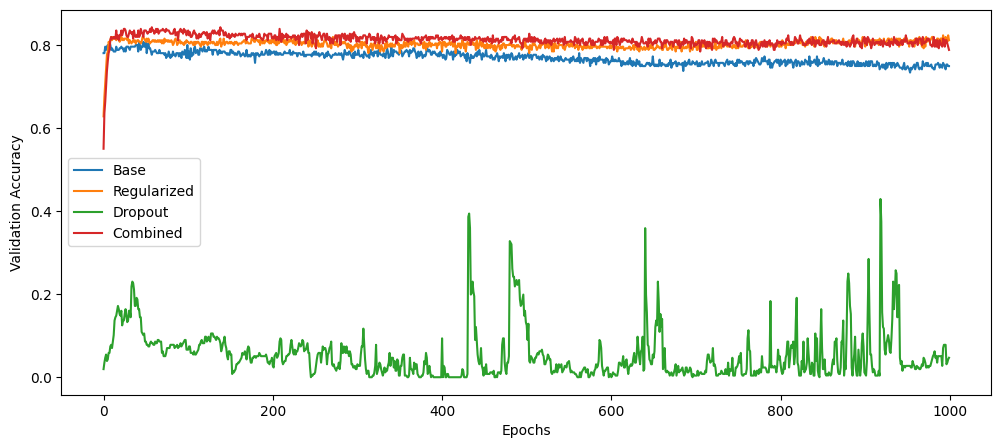

In [27]:
plt.figure(figsize=(12, 5))
for m, history, name in zip(
    [base_model, regularized_model, dropout_model, combined_model],
    [base_history, reg_history, drop_history, combined_history],
    ["Base", "Regularized", "Dropout", "Combined"],
):
    plt.plot(history.history["val_accuracy"], label=name)
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend()


plt.show()

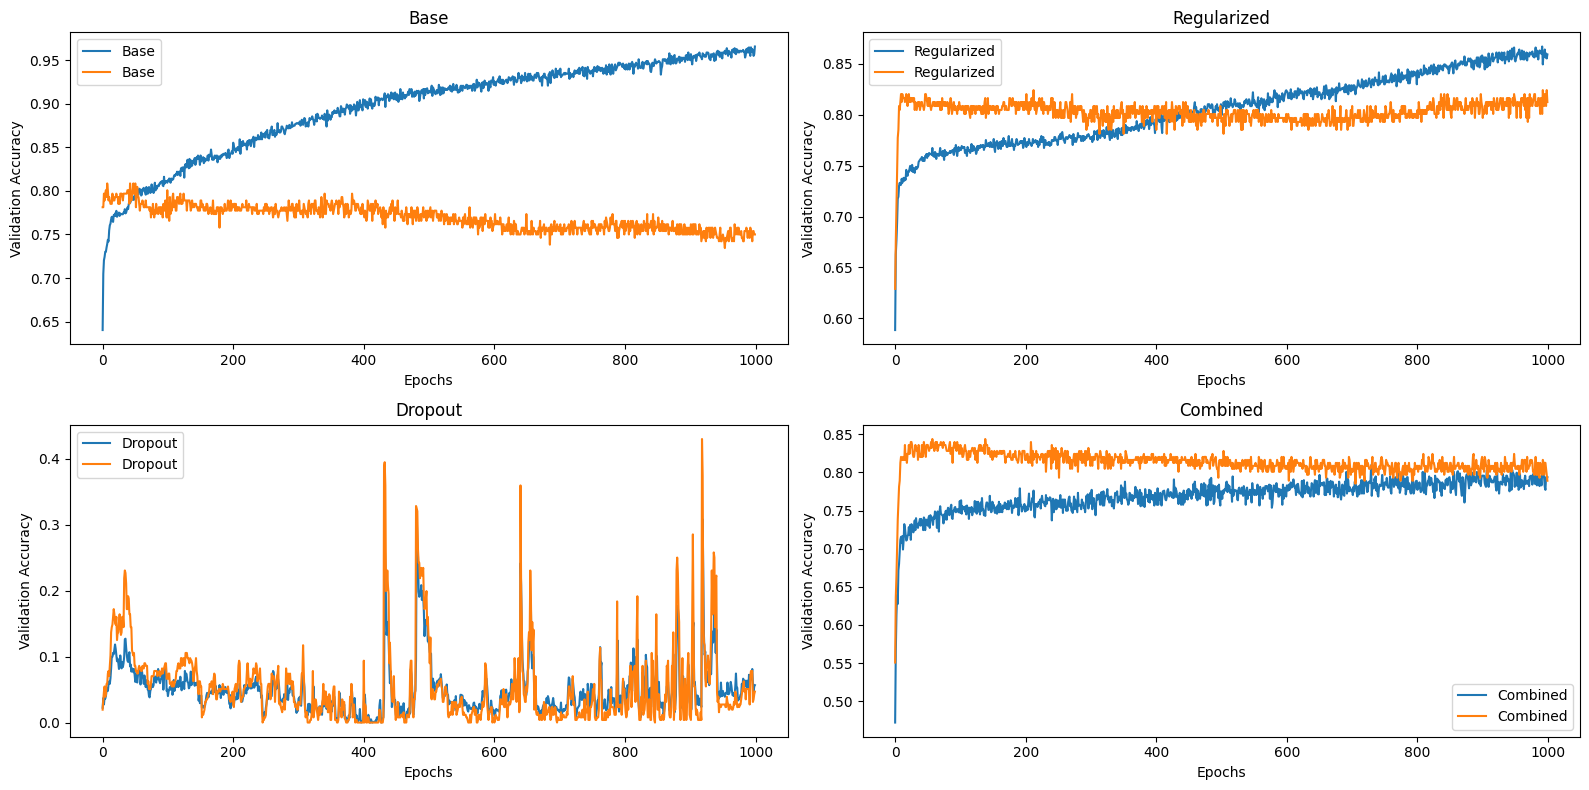

In [28]:
models = [base_model, regularized_model, dropout_model, combined_model]
histories = [base_history, reg_history, drop_history, combined_history]
names = ["Base", "Regularized", "Dropout", "Combined"]


plt.figure(figsize=(16, 8))

for i in range(len(models)):
    plt.subplot(2, 2, i+1) 
    plt.plot(histories[i].history["accuracy"], label=names[i])
    plt.plot(histories[i].history["val_accuracy"], label=names[i])
    plt.ylabel("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.title(names[i])
    plt.legend()

# Display the plots
plt.tight_layout()  # Adjusts the plots so that they don't overlap
plt.show()

## Tasks and Questions

1. Implement L1/L2 regularization and Dropout in the provided model structures.
2. Implement the visualizations.
3. Observe the effect of each technique on model performance.
4. Discuss which regularization technique seemed most effective and why.

## Conclusion

Reflect on the importance of regularization techniques in training neural networks and their impact on model performance and generalization
